## Apparel Size Prediction for Kenyan E-Commerce Using Supervised Learning

**Project Description**  
This project focuses on building a predictive model that recommends the most appropriate clothing size (e.g., XS, S, M, L, XL)  
for users based on their physical attributes such as height, weight, age, gender, bust, hips, and chest measurements.  
The goal is to enhance the online shopping experience by reducing size mismatches and returns—one of the biggest challenges in e-commerce fashion.  

In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [66]:
df = pd.read_csv("clothing_size_prediction_dataset.csv")

In [67]:
df.head()

,height_cm,weight_kg,age,bust_cm,hips_cm,chest_cm,gender,size_label
0,172.967142,53.288780,59.0,NaN,114.164543,100.80285,Male,XS
1,166.617357,60.536037,30.0,106.692469,104.138267,NaN,Female,S
2,174.476885,55.869097,58.0,81.157240,109.416462,NaN,Female,S
3,183.230299,61.780063,23.0,85.127791,97.886097,NaN,Female,S
4,165.658466,66.787745,NaN,92.123801,85.230682,NaN,Female,M


In [68]:
# Check initial data info
print("Initial Data Overview:")
print(df.info())

Initial Data Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   height_cm   5700 non-null   float64
 1   weight_kg   5700 non-null   float64
 2   age         5700 non-null   float64
 3   bust_cm     2854 non-null   float64
 4   hips_cm     5700 non-null   float64
 5   chest_cm    2862 non-null   float64
 6   gender      6000 non-null   object 
 7   size_label  6000 non-null   object 
dtypes: float64(6), object(2)
memory usage: 375.1+ KB
None


In [69]:
#checking for missing values
df.isna().sum()

height_cm      300
weight_kg      300
age            300
bust_cm       3146
hips_cm        300
chest_cm      3138
gender           0
size_label       0
dtype: int64

**Handle Missing Values & Create Unified Feature**

In [70]:
# Fill bust and chest separately
df['bust_cm'] = df['bust_cm'].fillna(df[df['gender'] == 'Female']['bust_cm'].median())
df['chest_cm'] = df['chest_cm'].fillna(df[df['gender'] == 'Male']['chest_cm'].median())

In [71]:
# Unified upper body measurement (chest for males, bust for females)
df["upper_body_cm"] = df.apply(
    lambda row: row["chest_cm"] if row["gender"] == "Male" else row["bust_cm"], axis=1
)

In [72]:
df.head()

,height_cm,weight_kg,age,bust_cm,hips_cm,chest_cm,gender,size_label,upper_body_cm
0,172.967142,53.288780,59.0,90.295917,114.164543,100.802850,Male,XS,100.802850
1,166.617357,60.536037,30.0,106.692469,104.138267,99.702292,Female,S,106.692469
2,174.476885,55.869097,58.0,81.157240,109.416462,99.702292,Female,S,81.157240
3,183.230299,61.780063,23.0,85.127791,97.886097,99.702292,Female,S,85.127791
4,165.658466,66.787745,NaN,92.123801,85.230682,99.702292,Female,M,92.123801


In [73]:
# Fill other missing values
for col in ['height_cm', 'weight_kg', 'age', 'hips_cm']:
    df[col] = df[col].fillna(df[col].median())

In [74]:
df.isna().sum()

height_cm        0
weight_kg        0
age              0
bust_cm          0
hips_cm          0
chest_cm         0
gender           0
size_label       0
upper_body_cm    0
dtype: int64

In [75]:
df.describe()

,height_cm,weight_kg,age,bust_cm,hips_cm,chest_cm,upper_body_cm
count,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000
mean,168.749763,70.494589,41.147667,90.212018,94.972634,99.753287,94.983446
std,12.437727,15.977374,13.236820,6.892263,9.550898,6.958462,10.923627
min,135.587327,30.000000,18.000000,56.651073,58.449135,55.343961,55.343961
25%,161.749954,60.568568,30.000000,90.295917,88.588033,99.702292,87.841622
50%,168.140393,69.940923,41.000000,90.295917,94.986812,99.702292,94.986050
75%,174.452557,79.734226,52.000000,90.295917,101.155905,99.702292,101.989182
max,250.000000,186.612810,64.000000,129.423310,131.113501,136.916245,136.916245


**Checking for outliers**

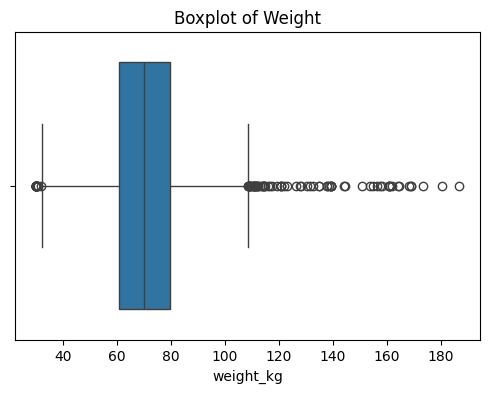

In [76]:
plt.figure(figsize=(6,4))
sns.boxplot(x=df['weight_kg'])
plt.title("Boxplot of Weight")
plt.show()

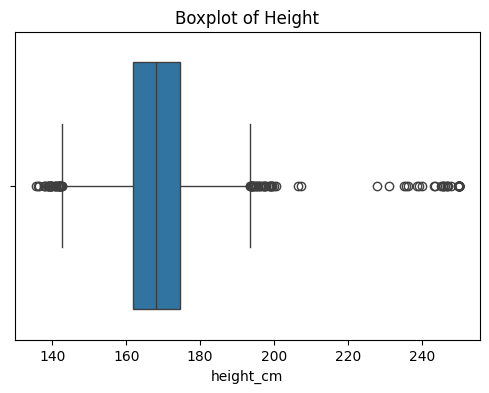

In [77]:
plt.figure(figsize=(6,4))
sns.boxplot(x=df['height_cm'])
plt.title("Boxplot of Height")
plt.show()

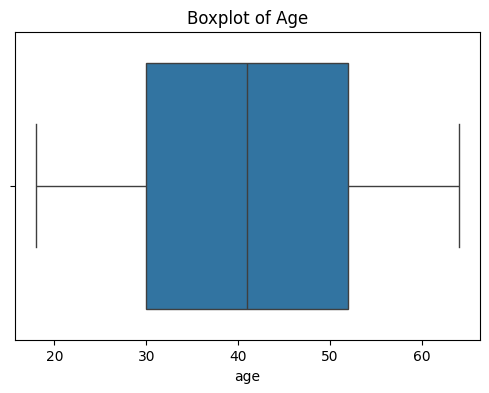

In [78]:
plt.figure(figsize=(6,4))
sns.boxplot(x=df['age'])
plt.title("Boxplot of Age")
plt.show()

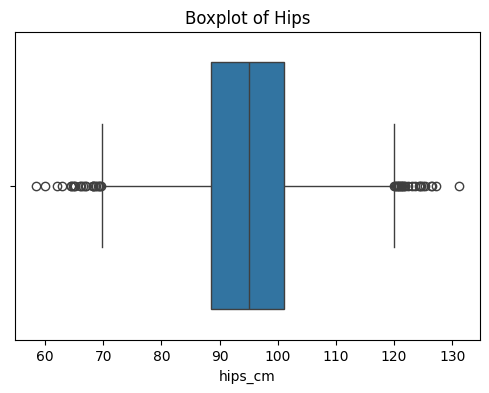

In [79]:
plt.figure(figsize=(6,4))
sns.boxplot(x=df['hips_cm'])
plt.title("Boxplot of Hips")
plt.show()

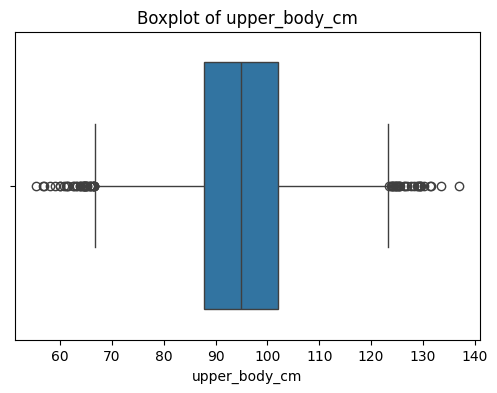

In [80]:
plt.figure(figsize=(6,4))
sns.boxplot(x=df['upper_body_cm'])
plt.title("Boxplot of upper_body_cm")
plt.show()

**Winsorize Outliers**  
This keeps the dataset representative while reducing the impact of extreme values.  

In [81]:
from scipy.stats.mstats import winsorize

In [82]:
numeric_cols = ['height_cm','weight_kg','hips_cm','age','upper_body_cm']
for col in numeric_cols:
    df[col] = winsorize(df[col], limits =[0.01,0.01])

In [83]:
# Convert height from cm to meters for BMI
df["height_m"] = df["height_cm"] / 100

In [84]:
# BMI = weight (kg) / height (m)^2
df["BMI"] = df["weight_kg"] / (df["height_m"] ** 2)

In [85]:
# Age Group categorization
def categorize_age(age):
    if pd.isnull(age):
        return "Unknown"
    elif age <= 19:
        return "Teen"
    elif age <= 35:
        return "Young Adult"
    elif age <= 55:
        return "Adult"
    else:
        return "Senior"

df["age_group"] = df["age"].apply(categorize_age)

In [86]:
# Ratios
df["bust_to_hip_ratio"] = df["bust_cm"] / df["hips_cm"]
df["chest_to_hip_ratio"] = df["chest_cm"] / df["hips_cm"]
df["height_to_hip_ratio"] = df["height_cm"] / df["hips_cm"]

In [87]:
df.head()

,height_cm,weight_kg,age,bust_cm,hips_cm,chest_cm,gender,size_label,upper_body_cm,height_m,BMI,age_group,bust_to_hip_ratio,chest_to_hip_ratio,height_to_hip_ratio
0,172.967142,53.288780,59.0,90.295917,114.164543,100.802850,Male,XS,100.802850,1.729671,17.811831,Senior,0.790928,0.882961,1.515069
1,166.617357,60.536037,30.0,106.692469,104.138267,99.702292,Female,S,106.692469,1.666174,21.805874,Young Adult,1.024527,0.957403,1.599963
2,174.476885,55.869097,58.0,81.157240,109.416462,99.702292,Female,S,81.157240,1.744769,18.352526,Senior,0.741728,0.911218,1.594613
3,183.230299,61.780063,23.0,85.127791,97.886097,99.702292,Female,S,85.127791,1.832303,18.401523,Young Adult,0.869662,1.018554,1.871873
4,165.658466,66.787745,41.0,92.123801,85.230682,99.702292,Female,M,92.123801,1.656585,24.337138,Adult,1.080876,1.169793,1.943648


**Visualizations**

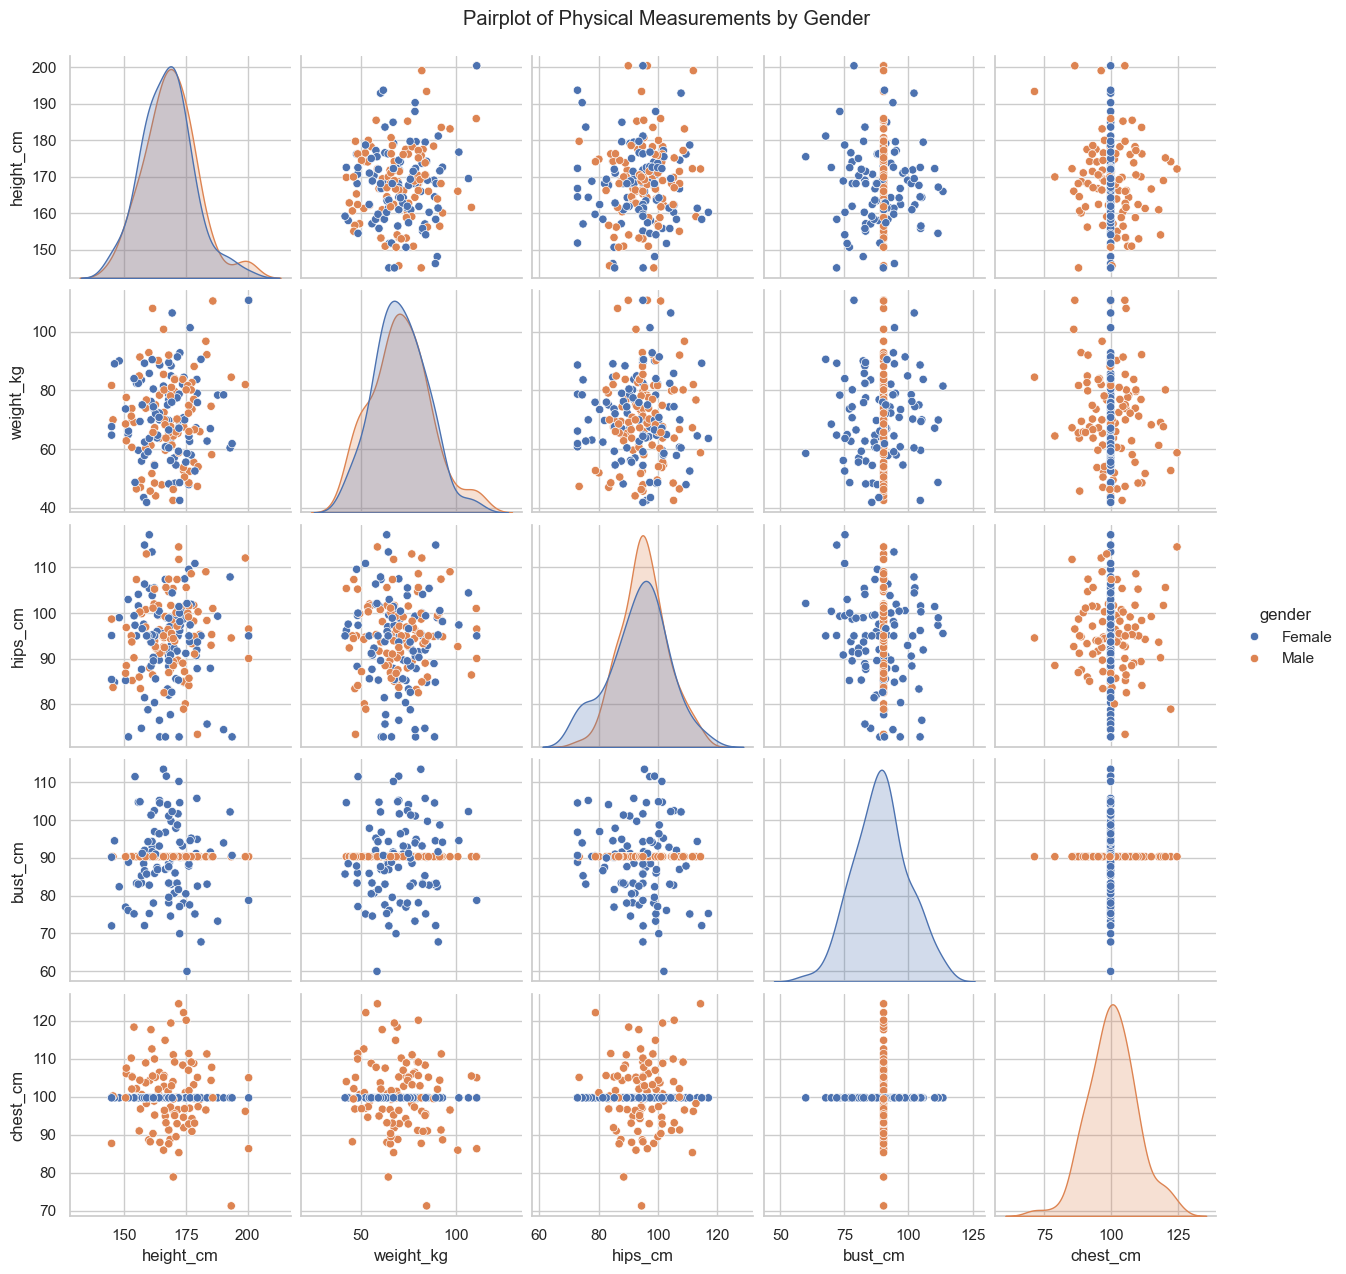

In [90]:
sns.pairplot(df.sample(200), hue="gender", vars=["height_cm", "weight_kg", "hips_cm", "bust_cm", "chest_cm"])
plt.suptitle("Pairplot of Physical Measurements by Gender", y=1.02)
plt.show()

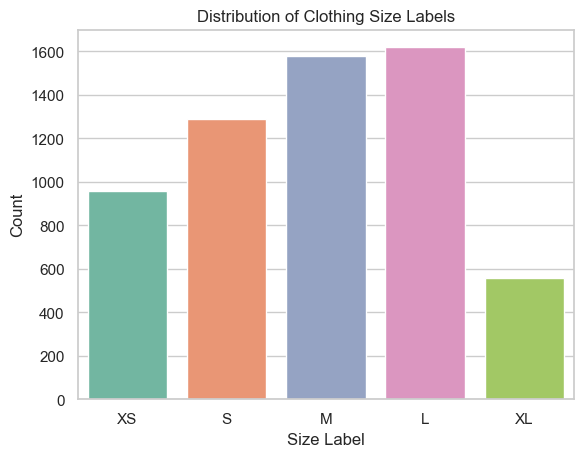

In [93]:
sns.countplot(data=df, x="size_label", hue="size_label", palette="Set2", legend=False)
plt.title("Distribution of Clothing Size Labels")
plt.xlabel("Size Label")
plt.ylabel("Count")
plt.show()

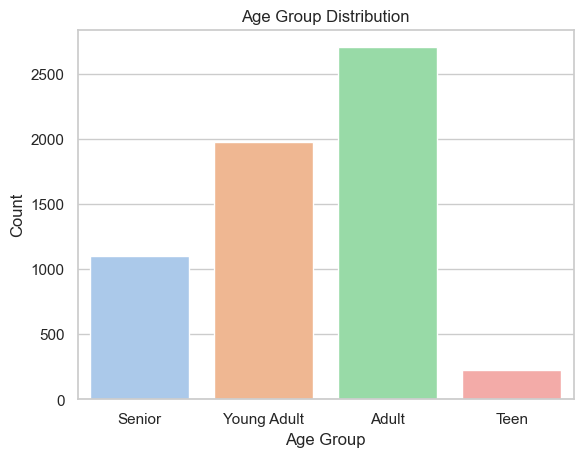

In [94]:
sns.countplot(data=df, x="age_group",hue="age_group", palette="pastel")
plt.title("Age Group Distribution")
plt.xlabel("Age Group")
plt.ylabel("Count")
plt.show()

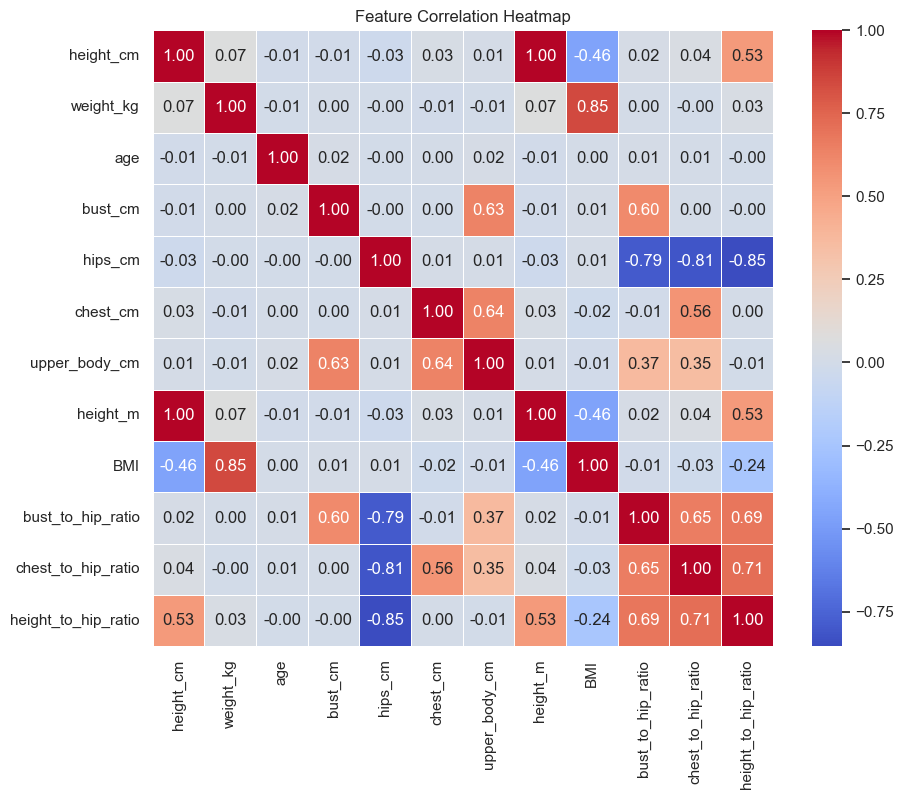

In [95]:
# Select only numeric columns
numeric_cols = df.select_dtypes(include=["float64", "int64"]).columns

# Compute correlation matrix
corr_matrix = df[numeric_cols].corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

In [96]:
features = [
    "height_cm", "weight_kg", "age", "BMI", "upper_body_cm",
    "hips_cm", "bust_to_hip_ratio", "chest_to_hip_ratio", "height_to_hip_ratio"
]

In [98]:
df.head()

,height_cm,weight_kg,age,bust_cm,hips_cm,chest_cm,gender,size_label,upper_body_cm,height_m,BMI,age_group,bust_to_hip_ratio,chest_to_hip_ratio,height_to_hip_ratio
0,172.967142,53.288780,59.0,90.295917,114.164543,100.802850,Male,XS,100.802850,1.729671,17.811831,Senior,0.790928,0.882961,1.515069
1,166.617357,60.536037,30.0,106.692469,104.138267,99.702292,Female,S,106.692469,1.666174,21.805874,Young Adult,1.024527,0.957403,1.599963
2,174.476885,55.869097,58.0,81.157240,109.416462,99.702292,Female,S,81.157240,1.744769,18.352526,Senior,0.741728,0.911218,1.594613
3,183.230299,61.780063,23.0,85.127791,97.886097,99.702292,Female,S,85.127791,1.832303,18.401523,Young Adult,0.869662,1.018554,1.871873
4,165.658466,66.787745,41.0,92.123801,85.230682,99.702292,Female,M,92.123801,1.656585,24.337138,Adult,1.080876,1.169793,1.943648


**Encode categorical values**

In [100]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Encode gender with saved encoder
gender_encoder = LabelEncoder()
df['gender'] = gender_encoder.fit_transform(df['gender'])
print("Gender classes:", dict(zip(gender_encoder.classes_, gender_encoder.transform(gender_encoder.classes_))))

Gender classes: {'Female': np.int64(0), 'Male': np.int64(1)}


In [101]:
# Encode size label (target) with saved encoder
size_encoder = LabelEncoder()
y = size_encoder.fit_transform(df['size_label'])
print("Size label classes:", dict(zip(size_encoder.classes_, size_encoder.transform(size_encoder.classes_))))

Size label classes: {'L': np.int64(0), 'M': np.int64(1), 'S': np.int64(2), 'XL': np.int64(3), 'XS': np.int64(4)}


**Features and scaling**

In [102]:
X = df.drop(columns=['size_label', 'bust_cm', 'chest_cm', 'gender', 'height_m', 'age_group'])
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [103]:
##Importations
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    classification_report,
    accuracy_score,
    ConfusionMatrixDisplay
)

In [104]:
# Train-test split with stratification
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, stratify=y, random_state=42)

In [105]:
log_model = LogisticRegression(max_iter=1000, random_state=42)
log_model.fit(X_train, y_train)
y_pred_log = log_model.predict(X_test)

In [106]:
# Evaluation
print("\n--- Logistic Regression ---")
print('Accuracy', accuracy_score(y_test, y_pred_log))
print(classification_report(y_test, y_pred_log, target_names=size_encoder.classes_))


--- Logistic Regression ---
Accuracy 0.8925
              precision    recall  f1-score   support

           L       0.89      0.94      0.91       324
           M       0.85      0.90      0.88       316
           S       0.92      0.90      0.91       258
          XL       0.81      0.68      0.74       111
          XS       0.98      0.92      0.95       191

    accuracy                           0.89      1200
   macro avg       0.89      0.87      0.88      1200
weighted avg       0.89      0.89      0.89      1200



In [107]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

In [108]:
#Evaluation
print("\n--- Random Forest ---")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf, target_names=size_encoder.classes_))


--- Random Forest ---
Accuracy: 0.9541666666666667
              precision    recall  f1-score   support

           L       0.99      0.96      0.97       324
           M       0.90      0.98      0.94       316
           S       0.97      0.94      0.95       258
          XL       0.93      0.91      0.92       111
          XS       1.00      0.94      0.97       191

    accuracy                           0.95      1200
   macro avg       0.96      0.95      0.95      1200
weighted avg       0.96      0.95      0.95      1200



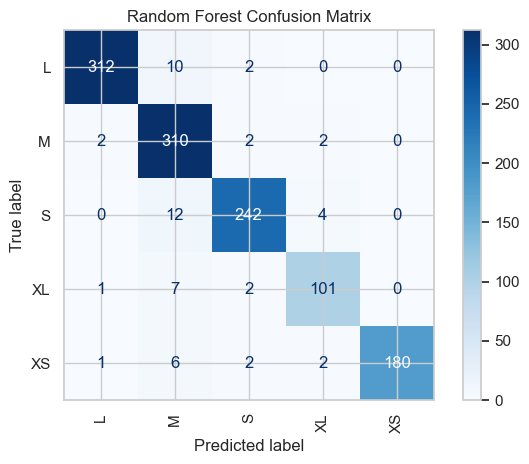

In [109]:
# confusion Matrix for random forest
ConfusionMatrixDisplay.from_estimator(
    rf_model,
    X_test,
    y_test,
    display_labels=size_encoder.classes_,
    cmap="Blues",
    xticks_rotation="vertical"
)
plt.title("Random Forest Confusion Matrix")
plt.tight_layout()
plt.show()